In [1]:
import pandas as pd
import numpy as np
import inventorize3 as inv
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

(array([ 7., 11., 33., 52., 81., 72., 55., 34., 17.,  4.]),
 array([ 72. ,  83.7,  95.4, 107.1, 118.8, 130.5, 142.2, 153.9, 165.6,
        177.3, 189. ]),
 <BarContainer object of 10 artists>)

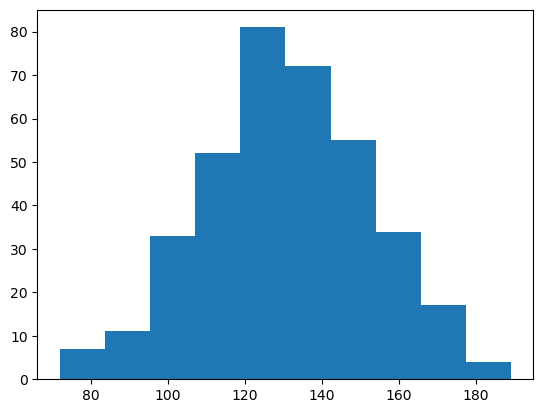

In [2]:
df = pd.read_csv('pineapple_juice.csv')
plt.hist(df['quantity'], bins = 10)

In [3]:
mean_daily_demand = df['quantity'].mean()
std_daily_demand = df['quantity'].std()
ordering_cost = 3
holding_cost = 0.2
product_value = 5
storage_cost = 2
selling_price = 10
review_period = 5
lead_time = 7
service_level = 0.8

In [4]:
### Min Q replenishment policy - s, Q model
EOQ = math.sqrt((2*mean_daily_demand*355*ordering_cost)/(holding_cost*product_value))

sQ_model = inv.sim_min_Q_normal(demand = df['quantity'], 
                            mean = mean_daily_demand, 
                            sd = std_daily_demand, 
                            leadtime = lead_time, 
                            service_level = service_level, 
                            Quantity = EOQ, 
                            shortage_cost = selling_price - product_value, 
                            inventory_cost = storage_cost, 
                            ordering_cost = ordering_cost)
sQ_model

[     period  demand  sales  inventory_level  inventory_position  min  \
 0         1       0    0.0       962.000000          962.000000  962   
 1         2     131  131.0       831.000000         1358.389410  962   
 2         3     147  147.0       684.000000         1211.389410  962   
 3         4     101  101.0       583.000000         1110.389410  962   
 4         5     139  139.0       444.000000          971.389410  962   
 ..      ...     ...    ...              ...                 ...  ...   
 362     363     174  174.0       220.778821         1275.557641  962   
 363     364     130  130.0        90.778821         1145.557641  962   
 364     365      84   84.0         6.778821         1061.557641  962   
 365     366     138  138.0       396.168231          923.557641  962   
 366     367     127  127.0       269.168231         1323.947052  962   
 
          order   recieved  lost_order  
 0      0.00000    0.00000         0.0  
 1    527.38941    0.00000         0.0  

In [5]:
### Min Max replenishment policy - s, S model
demand_during_lead_time = mean_daily_demand*(lead_time)
standard_deviation_of_demand_during_lead_time = math.sqrt(lead_time) * std_daily_demand
safety_stock = norm.ppf(service_level) * standard_deviation_of_demand_during_lead_time
reorder_point = safety_stock + demand_during_lead_time

sS_model = inv.sim_min_max_normal(demand = df['quantity'], 
                                  mean = mean_daily_demand, 
                                  sd = std_daily_demand, 
                                  leadtime = lead_time, 
                                  service_level = service_level, 
                                  Min = reorder_point,
                                  Max = 2*reorder_point, 
                                  shortage_cost = selling_price - product_value, 
                                  inventory_cost = storage_cost, 
                                  ordering_cost = ordering_cost)
sS_model[0]

,period,demand,sales,inventory_level,inventory_position,min,order,max,recieved,lost_order
0,1,0,0.000000,961.551896,961.551896,961.551896,0.000000,1923.103791,0.0,0.000000
1,2,131,131.000000,830.551896,1792.103791,961.551896,961.551896,1923.103791,0.0,0.000000
2,3,147,147.000000,683.551896,1645.103791,961.551896,0.000000,1923.103791,0.0,0.000000
3,4,101,101.000000,582.551896,1544.103791,961.551896,0.000000,1923.103791,0.0,0.000000
4,5,139,139.000000,443.551896,1405.103791,961.551896,0.000000,1923.103791,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
362,363,174,153.103791,0.000000,1007.000000,961.551896,0.000000,1923.103791,0.0,20.896209
363,364,130,130.000000,877.000000,877.000000,961.551896,0.000000,1923.103791,1007.0,0.000000
364,365,84,84.000000,793.000000,1839.103791,961.551896,1046.103791,1923.103791,0.0,0.000000
365,366,138,138.000000,655.000000,1701.103791,961.551896,0.000000,1923.103791,0.0,0.000000


In [6]:
### Periodic replenishment policy - R, S model

demand_during_review_period_and_lead_time = mean_daily_demand*(lead_time + review_period)
standard_deviation_of_demand_during_review_period_and_lead_time = math.sqrt(lead_time + review_period) * std_daily_demand
safety_stock = norm.ppf(service_level) * standard_deviation_of_demand_during_review_period_and_lead_time
order_up_to_level_leadtime_reviewperiod = safety_stock + demand_during_review_period_and_lead_time


RS_model = inv.Periodic_review_normal(demand = df['quantity'], 
                                      mean = mean_daily_demand, 
                                      sd = std_daily_demand, 
                                      leadtime = lead_time, 
                                      service_level = service_level, 
                                      Review_period = review_period, 
                                      shortage_cost = selling_price - product_value, 
                                      inventory_cost = storage_cost, 
                                      ordering_cost = ordering_cost)
RS_model[0]

,period,demand,sales,inventory_level,inventory_position,order,max,recieved,lost_order
0,1,0,0.0,1629.0,1629.0,0.0,1629,0.0,0.0
1,2,131,131.0,1498.0,1498.0,0.0,1629,0.0,0.0
2,3,147,147.0,1351.0,1351.0,0.0,1629,0.0,0.0
3,4,101,101.0,1250.0,1250.0,0.0,1629,0.0,0.0
4,5,139,139.0,1111.0,1111.0,0.0,1629,0.0,0.0
...,...,...,...,...,...,...,...,...,...
362,363,174,174.0,557.0,1190.0,0.0,1629,661.0,0.0
363,364,130,130.0,427.0,1060.0,0.0,1629,0.0,0.0
364,365,84,84.0,343.0,976.0,0.0,1629,0.0,0.0
365,366,138,138.0,205.0,1491.0,653.0,1629,0.0,0.0


In [7]:
### Hybrid replenishment policy - R, s, S model

RsS_model = inv.Hibrid_normal(demand = df['quantity'], 
                              mean = mean_daily_demand, 
                              sd = std_daily_demand, 
                              leadtime = lead_time, 
                              service_level = service_level, 
                              Review_period = review_period, Min = reorder_point, 
                              shortage_cost = selling_price - product_value, 
                              inventory_cost = storage_cost, 
                              ordering_cost = ordering_cost)
RsS_model[0]

,period,demand,sales,inventory_level,min,inventory_position,order,max,recieved,lost_order
0,1,0,0.0,1629.0,961.551896,1629.0,0.0,1629,0.0,0.0
1,2,131,131.0,1498.0,961.551896,1498.0,0.0,1629,0.0,0.0
2,3,147,147.0,1351.0,961.551896,1351.0,0.0,1629,0.0,0.0
3,4,101,101.0,1250.0,961.551896,1250.0,0.0,1629,0.0,0.0
4,5,139,139.0,1111.0,961.551896,1111.0,0.0,1629,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
362,363,174,174.0,557.0,961.551896,1190.0,0.0,1629,661.0,0.0
363,364,130,130.0,427.0,961.551896,1060.0,0.0,1629,0.0,0.0
364,365,84,84.0,343.0,961.551896,976.0,0.0,1629,0.0,0.0
365,366,138,138.0,205.0,961.551896,1491.0,653.0,1629,0.0,0.0


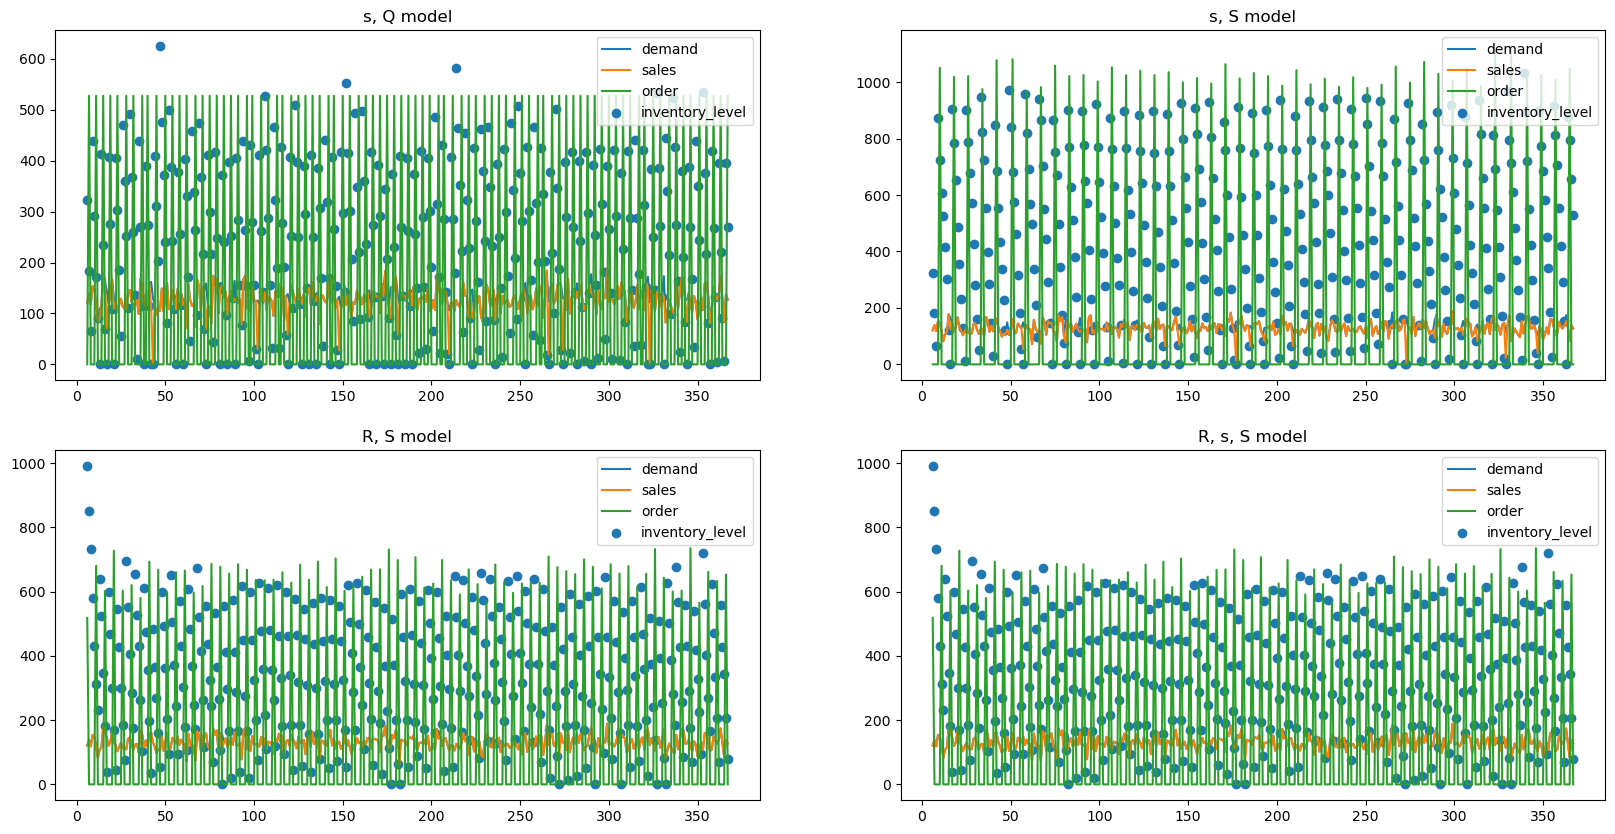

In [8]:
### visualize

fig, ax = plt.subplots(2, 2, figsize=(20, 10)) 

plt.subplot(2, 2, 1)
plt.plot(sQ_model[0]['period'][5:], sQ_model[0]['demand'][5:], label = 'demand')
plt.plot(sQ_model[0]['period'][5:], sQ_model[0]['sales'][5:], label = 'sales')
plt.plot(sQ_model[0]['period'][5:], sQ_model[0]['order'][5:], label = 'order')
plt.scatter(sQ_model[0]['period'][5:], sQ_model[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('s, Q model')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 2)
plt.plot(sS_model[0]['period'][5:], sS_model[0]['demand'][5:], label = 'demand')
plt.plot(sS_model[0]['period'][5:], sS_model[0]['sales'][5:], label = 'sales')
plt.plot(sS_model[0]['period'][5:], sS_model[0]['order'][5:], label = 'order')
plt.scatter(sS_model[0]['period'][5:], sS_model[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('s, S model')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 3)
plt.plot(RS_model[0]['period'][5:], RS_model[0]['demand'][5:], label = 'demand')
plt.plot(RS_model[0]['period'][5:], RS_model[0]['sales'][5:], label = 'sales')
plt.plot(RS_model[0]['period'][5:], RS_model[0]['order'][5:], label = 'order')
plt.scatter(RS_model[0]['period'][5:], RS_model[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('R, S model')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 4)
plt.plot(RsS_model[0]['period'][5:], RsS_model[0]['demand'][5:], label = 'demand')
plt.plot(RsS_model[0]['period'][5:], RsS_model[0]['sales'][5:], label = 'sales')
plt.plot(RsS_model[0]['period'][5:], RsS_model[0]['order'][5:], label = 'order')
plt.scatter(RsS_model[0]['period'][5:], RsS_model[0]['inventory_level'][5:], label = 'inventory_level')
plt.title('R, s, S model')
plt.legend(loc = 'upper right')